We are starting from the fragment-based mapping step to obtain matrix containing deletion event

In [1]:
from pytadbit.mapping.full_mapper import full_mapping
import pytadbit

IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [2]:
print 'Mapping the first end of the read\n'
mapped_r1 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del2.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del',
                         windows=(1, 40),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=True, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del')


Mapping the first end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 1-40
Mapping reads in window 1-40...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_rDWc0i
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del2.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_tmp_del/LaublabBglI

In [3]:
print 'n\nMapping the second end of the read\n'
mapped_r2 = full_mapping(gem_index_path='/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del2.gem',
                         fastq_path='/home/nikita/Projects/Chromosomal_aberrations/data/FASTQs/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1.fastq',
                         out_map_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del',
                         windows=(41, 80),
                         r_enz='BglII', frag_map=True, nthreads=4, clean=False, 
                         temp_dir='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del')


n
Mapping the second end of the read

Preparing FASTQ file
  - conversion to MAP format
  - trimming reads 41-80
Mapping reads in window 41-80...
TO GEM /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_7z6v22
/usr/local/bin/gem-mapper -I /home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Caulobacter_del2.gem -q offset-33 -m 0.04 -s 0 --allow-incomplete-strata 0.00 --granularity 10000 --max-decoded-matches 1 --min-decoded-strata 0 --min-insert-size 0 --max-insert-size 0 --min-matched-bases 0.8 --gem-quality-threshold 26 --max-big-indel-length 15 --mismatch-alphabet ACGT -E 0.30 --max-extendable-matches 20 --max-extensions-per-match 1 -e 0.04 -T 4 -i /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_tmp_del/Laubla

In [4]:
from pytadbit.parsers.genome_parser import parse_fasta
from matplotlib import pyplot as plt
import numpy as np

In [5]:
genome_seq = parse_fasta('/home/nikita/Projects/Chromosomal_aberrations/data/genome/Caulobacter_crescentus/Deletion2.fa')

Parsing chr1


In [6]:
from pytadbit.mapping.restriction_enzymes import map_re_sites

frags_BglII = map_re_sites('BglII', genome_seq, verbose=True)


Found 684 RE sites


In [7]:
c0 = frags_BglII.keys()[0]
v0 = 0
dists_BglII = []
for c1, v1 in [(c, v) for c in frags_BglII for p in frags_BglII[c] 
               for v in frags_BglII[c][p]]:
    if c1 == c0:
        diff = abs(v1 - v0)
        if diff < 30000:
            dists_BglII.append(diff)
    v0 = v1
    
plt.figure(figsize=(12, 6))
_ = plt.hist([dists_BglII], bins=50, color=['red'], 
             alpha=0.5, label=['BglII'])
y0, y1 = plt.ylim()
plt.vlines(np.median(dists_BglII), y0, y1 * 0.7, color='red', linestyle='--',
          label='median BglII')
plt.text(np.median(dists_BglII), y1 * 0.7, '%.0f' % np.median(dists_BglII), va='bottom', 
         ha='left')
plt.title('Restriction fragment size distribution')
plt.legend()
plt.grid()

In [8]:
maps1 = ['/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map', '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map']

maps2 = ['/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map', '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_41-80.map']


In [9]:
reads1 = '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/02_parsing/reads1.tsv'
reads2 = '/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/02_parsing/reads2.tsv'

In [10]:
from pytadbit.parsers.map_parser import parse_map
print 'Parse MAP files....'
parse_map(maps1, maps2, out_file1=reads1, out_file2=reads2, genome_seq=genome_seq, 
          re_name='BglII', 
          verbose=True)

Parse MAP files....
Searching and mapping RE sites to the reference genome
Found 684 RE sites
Loading read1
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_1-40.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r1_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_frag_1-40.map
Merge sort.................
Getting Multiple contacts
Loading read2
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_del/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map
loading file: /home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/01_mapping/Caulobacter_Bg

({0: {1: 15208807, 2: 1741000}, 1: {1: 13217193, 2: 1541744}},
 {0: 245306, 1: 175984})

In [11]:
from pytadbit.mapping import get_intersection
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_del/Caulobacter_BglII_replicate1_del/03_filtering/reads12.tsv'

In [12]:
get_intersection(reads1, reads2, reads, verbose=True) 

Getting intersection of reads 1 and reads 2:
 
  .......... .......
Found 14172618 pair of reads mapping uniquely
Sorting each temporary file by genomic coordinate
    1025/1025 sorted files
Removing temporary files...


(14172618, {2: 359397, 3: 4})

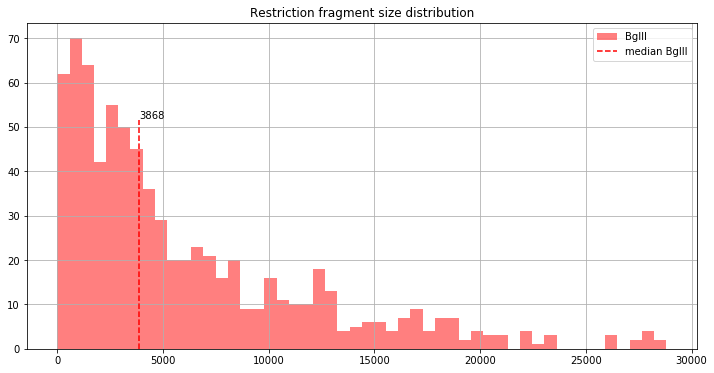

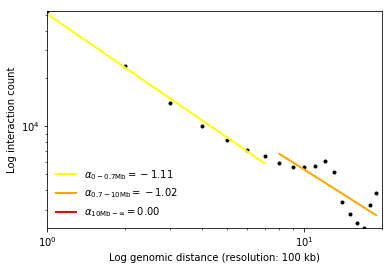

((-1.1093552886373472, 10.83634547985875, -0.99604735351135942),
 (-1.0240045861660643, 10.941141548716812, -0.78855045352524356),
 (0, 0, 0))

In [13]:
from pytadbit.mapping.analyze import plot_distance_vs_interactions
plot_distance_vs_interactions(reads, resolution=100000, max_diff=40, show=True)

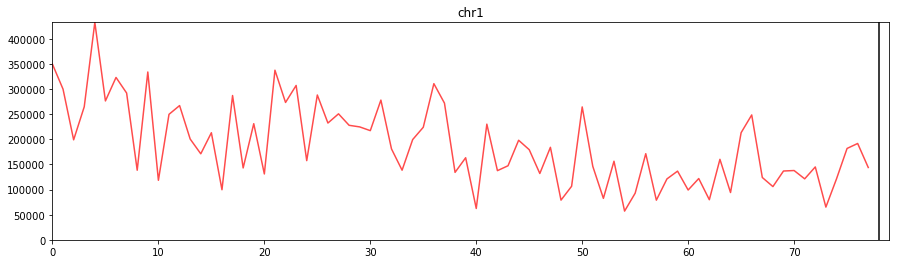

In [14]:
from pytadbit.mapping.analyze import plot_genomic_distribution
plot_genomic_distribution(reads, resolution=50000,  show=True)

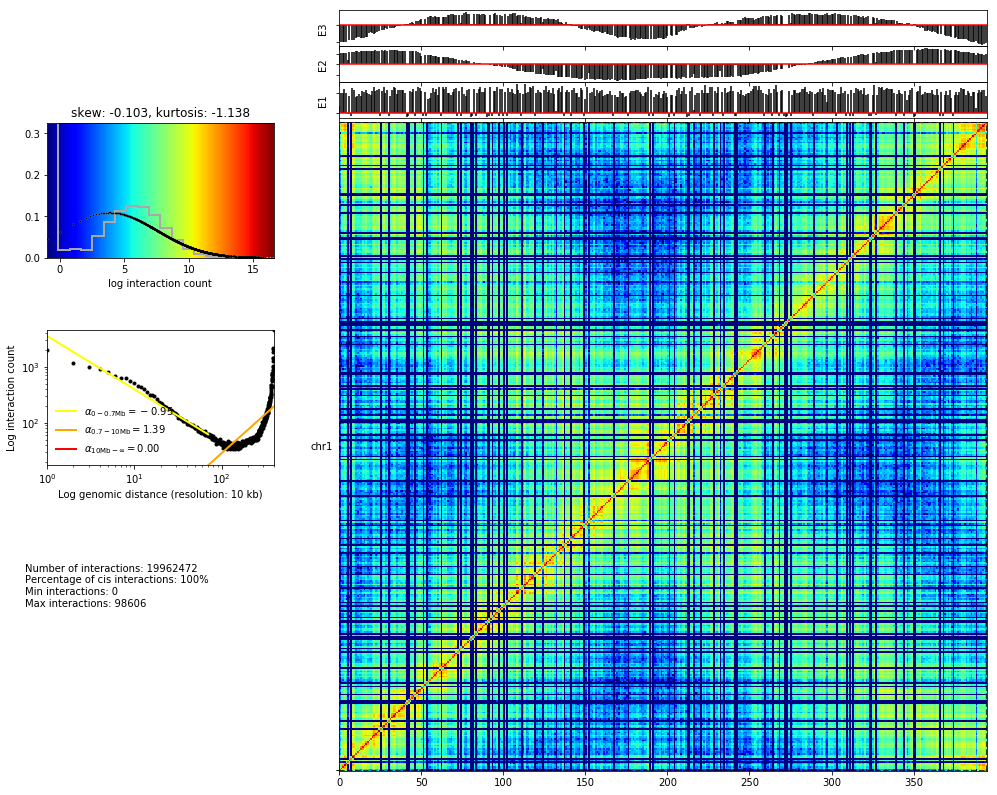

In [15]:
from pytadbit.mapping.analyze import hic_map
hic_map(reads, resolution=10000, show=True)